In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix

train1_path = "/kaggle/input/dataset/archive/train1"
train2_path = "/kaggle/input/dataset/archive/train2"
train3_path = "/kaggle/input/dataset/archive/train3"
val_path = "/kaggle/input/dataset/archive/val"
test_path = "/kaggle/input/testfile/test"

In [8]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train1_generator = train_datagen.flow_from_directory(
    train1_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers[:-3]:
    layer.trainable = False

In [11]:
x = base_model.output
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

In [12]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [16]:
history_train1 = model.fit(
    train1_generator,
    epochs=25, 
    validation_data=val_generator
)

Epoch 1/25


I0000 00:00:1708887417.216001     122 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


94/94 [==============================] - 34s 279ms/step - loss: 0.7561 - accuracy: 0.5810 - val_loss: 0.6736 - val_accuracy: 0.6370
Epoch 2/25
94/94 [==============================] - 15s 164ms/step - loss: 0.6587 - accuracy: 0.6110 - val_loss: 0.6724 - val_accuracy: 0.5800
Epoch 3/25
94/94 [==============================] - 15s 163ms/step - loss: 0.6013 - accuracy: 0.6797 - val_loss: 0.6264 - val_accuracy: 0.6380
Epoch 4/25
94/94 [==============================] - 15s 163ms/step - loss: 0.5971 - accuracy: 0.6867 - val_loss: 0.5896 - val_accuracy: 0.7120
Epoch 5/25
94/94 [==============================] - 14s 151ms/step - loss: 0.5598 - accuracy: 0.7143 - val_loss: 0.5553 - val_accuracy: 0.7020
Epoch 6/25
94/94 [==============================] - 15s 163ms/step - loss: 0.5442 - accuracy: 0.7137 - val_loss: 0.5398 - val_accuracy: 0.7190
Epoch 7/25
94/94 [==============================] - 15s 160ms/step - loss: 0.4907 - accuracy: 0.7660 - val_loss: 0.5615 - val_accuracy: 0.7130
Epoch 8/25

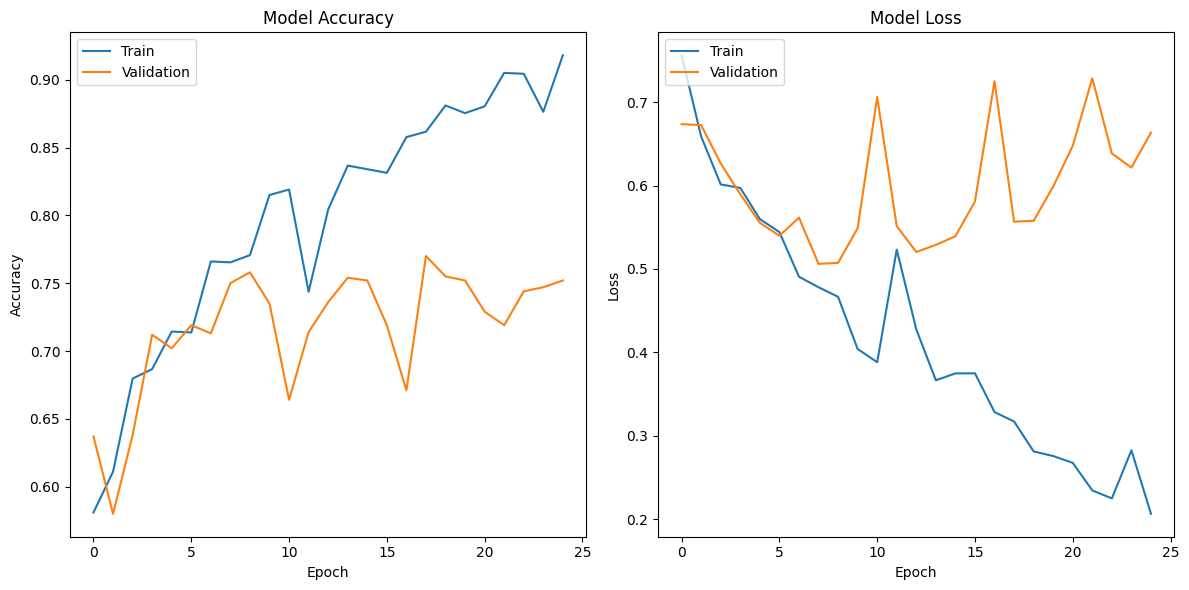

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_train1.history['accuracy'])
plt.plot(history_train1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history_train1.history['loss'])
plt.plot(history_train1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [18]:
test_path = "/kaggle/input/testfile/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 400 images belonging to 2 classes.


In [19]:
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_generator.classes

13/13 [==============================] - 6s 364ms/step


In [20]:
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,


Classification Report:
              precision    recall  f1-score   support

 normal-ceum       0.73      0.88      0.80       200
      polyps       0.85      0.68      0.76       200

    accuracy                           0.78       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.78      0.78       400


Confusion Matrix:
[[176  24]
 [ 64 136]]


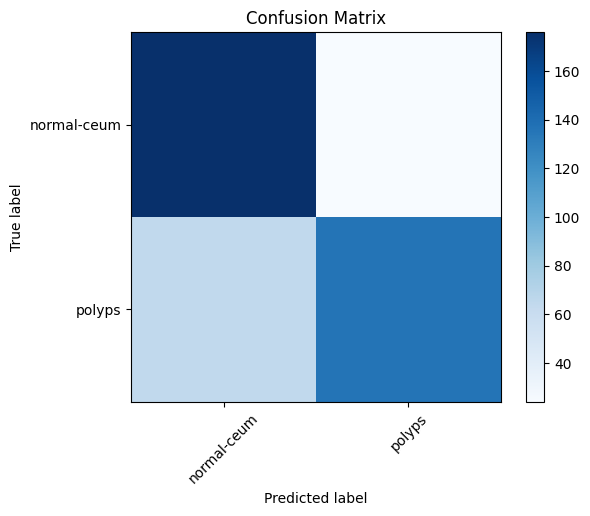

In [21]:
class_names = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
model_weights_path = "/kaggle/working/train1.h5"
model.save_weights(model_weights_path)

In [25]:
train2_generator = train_datagen.flow_from_directory(
    train2_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

history_train2 = model.fit(
    train2_generator,
    epochs=10,  
    validation_data=val_generator
)

Found 3000 images belonging to 2 classes.
Epoch 1/10
94/94 [==============================] - 24s 249ms/step - loss: 0.5483 - accuracy: 0.7553 - val_loss: 0.4995 - val_accuracy: 0.7610
Epoch 2/10
94/94 [==============================] - 15s 155ms/step - loss: 0.4460 - accuracy: 0.7860 - val_loss: 0.4805 - val_accuracy: 0.7690
Epoch 3/10
94/94 [==============================] - 14s 152ms/step - loss: 0.4425 - accuracy: 0.8030 - val_loss: 0.4955 - val_accuracy: 0.7550
Epoch 4/10
94/94 [==============================] - 15s 157ms/step - loss: 0.4025 - accuracy: 0.8133 - val_loss: 0.5047 - val_accuracy: 0.7550
Epoch 5/10
94/94 [==============================] - 15s 154ms/step - loss: 0.3825 - accuracy: 0.8303 - val_loss: 0.4749 - val_accuracy: 0.7810
Epoch 6/10
94/94 [==============================] - 16s 170ms/step - loss: 0.3594 - accuracy: 0.8377 - val_loss: 0.5035 - val_accuracy: 0.7530
Epoch 7/10
94/94 [==============================] - 15s 155ms/step - loss: 0.3382 - accuracy: 0.8543

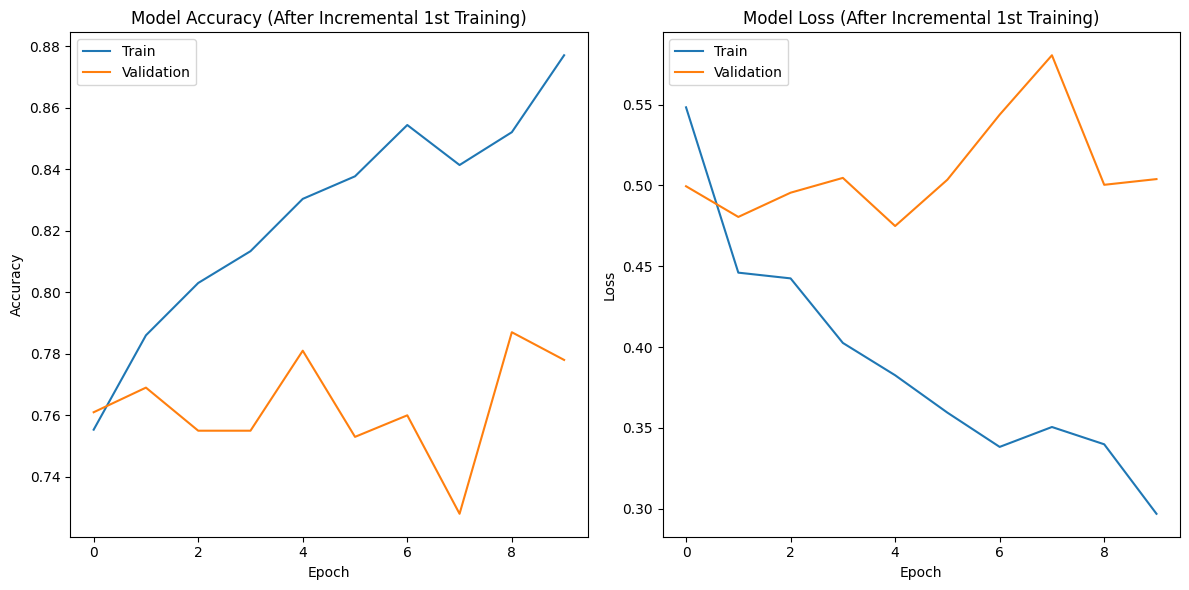

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_train2.history['accuracy'])
plt.plot(history_train2.history['val_accuracy'])
plt.title('Model Accuracy (After Incremental 1st Training)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_train2.history['loss'])
plt.plot(history_train2.history['val_loss'])
plt.title('Model Loss (After Incremental 1st Training)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [28]:
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_generator.classes

13/13 [==============================] - 3s 194ms/step



Classification Report:
              precision    recall  f1-score   support

 normal-ceum       0.79      0.88      0.83       200
      polyps       0.86      0.77      0.81       200

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400


Confusion Matrix:
[[176  24]
 [ 47 153]]


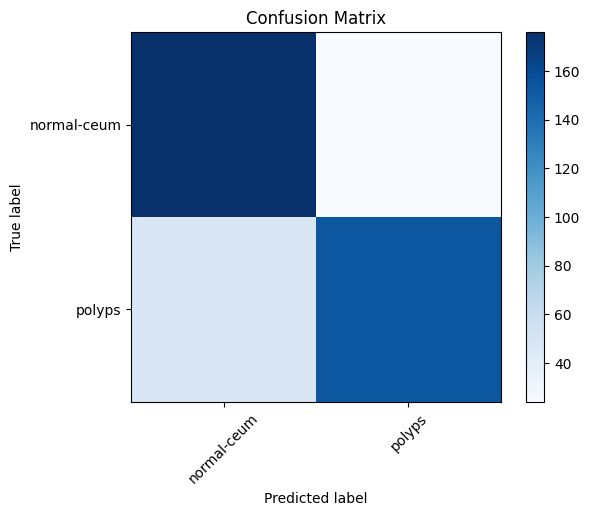

In [29]:
class_names = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
model_weights_path = "/kaggle/working/train2.h5"
model.save_weights(model_weights_path)

In [31]:
train3_generator = train_datagen.flow_from_directory(
    train3_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

history_train3 = model.fit(
    train3_generator,
    epochs=10,  
    validation_data=val_generator
)

Found 3000 images belonging to 2 classes.
Epoch 1/10
94/94 [==============================] - 21s 225ms/step - loss: 0.4898 - accuracy: 0.7720 - val_loss: 0.5045 - val_accuracy: 0.7510
Epoch 2/10
94/94 [==============================] - 15s 160ms/step - loss: 0.4698 - accuracy: 0.7810 - val_loss: 0.5408 - val_accuracy: 0.7370
Epoch 3/10
94/94 [==============================] - 15s 157ms/step - loss: 0.4259 - accuracy: 0.8053 - val_loss: 0.4542 - val_accuracy: 0.7830
Epoch 4/10
94/94 [==============================] - 15s 154ms/step - loss: 0.4392 - accuracy: 0.7907 - val_loss: 0.4992 - val_accuracy: 0.7620
Epoch 5/10
94/94 [==============================] - 14s 153ms/step - loss: 0.3700 - accuracy: 0.8353 - val_loss: 0.4558 - val_accuracy: 0.7910
Epoch 6/10
94/94 [==============================] - 15s 159ms/step - loss: 0.3761 - accuracy: 0.8300 - val_loss: 0.4609 - val_accuracy: 0.7920
Epoch 7/10
94/94 [==============================] - 14s 154ms/step - loss: 0.3351 - accuracy: 0.8550

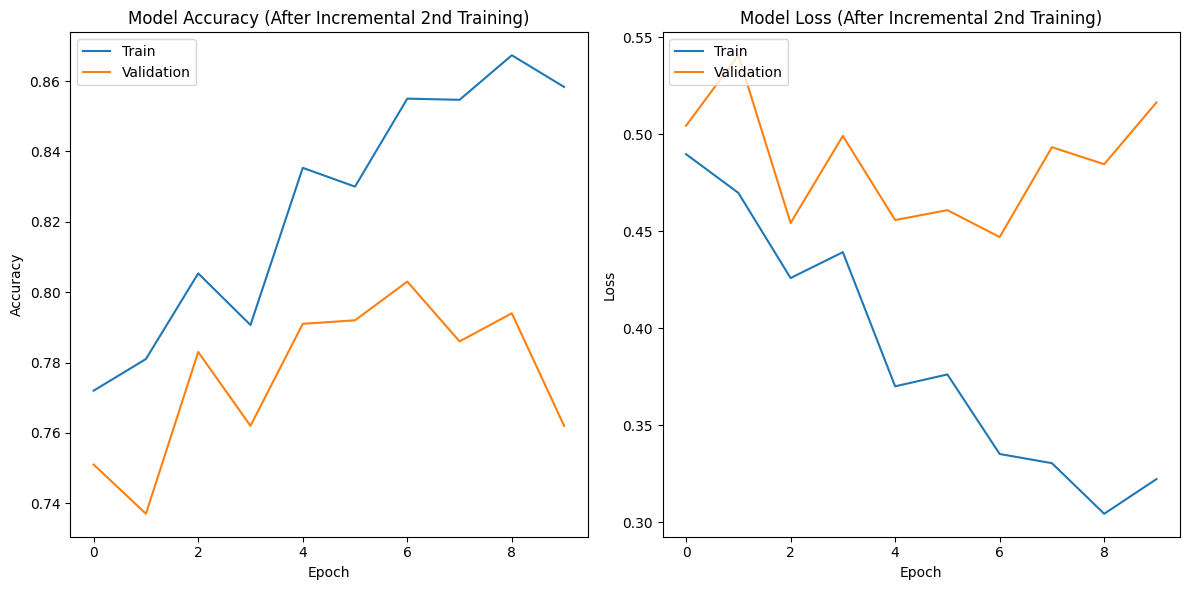

In [32]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_train3.history['accuracy'])
plt.plot(history_train3.history['val_accuracy'])
plt.title('Model Accuracy (After Incremental 2nd Training)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_train3.history['loss'])
plt.plot(history_train3.history['val_loss'])
plt.title('Model Loss (After Incremental 2nd Training)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [33]:
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_generator.classes

13/13 [==============================] - 2s 187ms/step



Classification Report:
              precision    recall  f1-score   support

 normal-ceum       0.74      0.90      0.81       200
      polyps       0.87      0.68      0.76       200

    accuracy                           0.79       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.80      0.79      0.79       400


Confusion Matrix:
[[179  21]
 [ 64 136]]


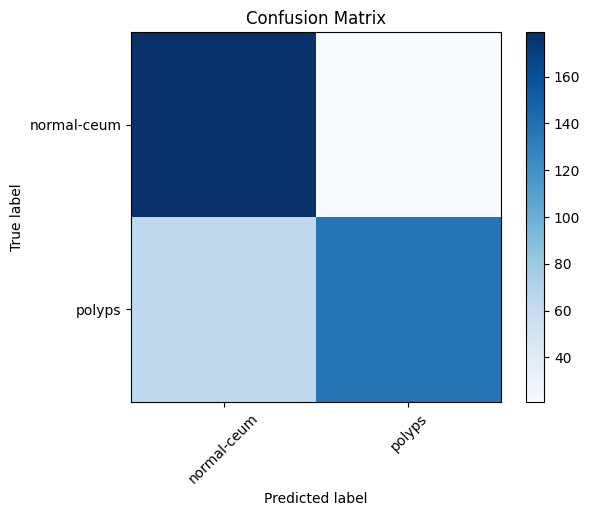

In [34]:
class_names = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [35]:
model_weights_path = "/kaggle/working/train3.h5"
model.save_weights(model_weights_path)